/tmp/ipykernel_18784/46240715.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Species'] = data['Species'].str.replace(r'\(.*\)', '').str.strip()


Prediction Accuracy: 98.55%
Classification Report:
                    precision    recall  f1-score   support

   Adelie Penguin       1.00      1.00      1.00        32
Chinstrap penguin       0.94      1.00      0.97        16
   Gentoo penguin       1.00      0.95      0.98        21

         accuracy                           0.99        69
        macro avg       0.98      0.98      0.98        69
     weighted avg       0.99      0.99      0.99        69



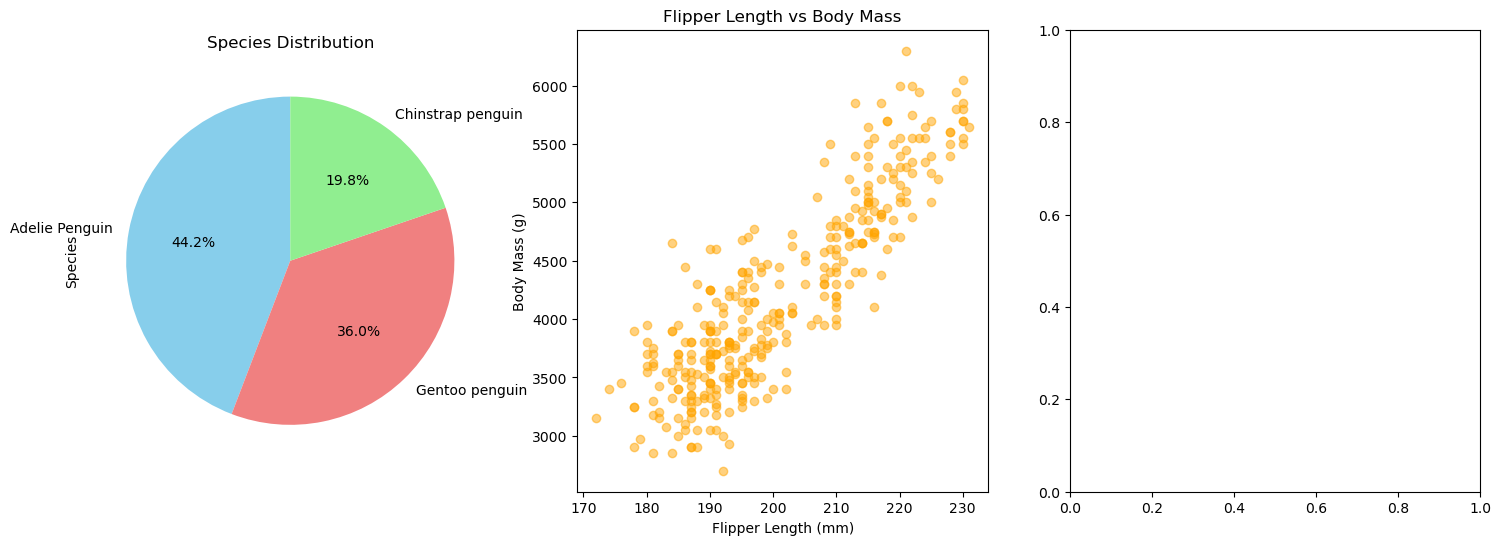

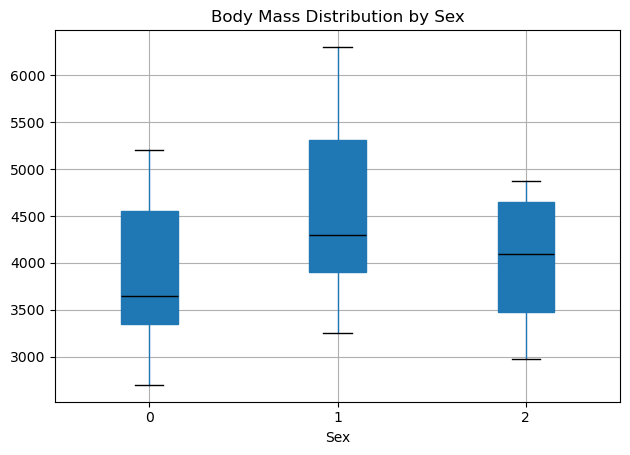

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Read the dataset from a CSV file (adjust the path accordingly)
file_path = "penguins_Iter.csv"
data = pd.read_csv(file_path, delimiter=";")

# Preprocess data
data['Species'] = data['Species'].str.replace(r'\(.*\)', '').str.strip()
data = data.dropna(subset=['Species'])

# Encode categorical variables (if needed)
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'].astype(str))

# Features and target variable
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']
target = 'Species'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Species Distribution - Pie Chart
species_percentage = data['Species'].value_counts(normalize=True) * 100

plt.figure(figsize=(18, 6))

# Pie chart for species distribution
plt.subplot(1, 3, 1)
species_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Species Distribution')

# Scatter plot for Flipper Length (mm) vs Body Mass (g)
plt.subplot(1, 3, 2)
plt.scatter(data['Flipper Length (mm)'], data['Body Mass (g)'], alpha=0.5, color='orange')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Body Mass distribution based on Sex
plt.subplot(1, 3, 3)
data.boxplot(column='Body Mass (g)', by='Sex', patch_artist=True, medianprops={'color':'black'})
plt.title('Body Mass Distribution by Sex')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()